<a href="https://colab.research.google.com/github/DerinOgrenme2021/BarisYildiz/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.datasets.samples_generator import make_blobs

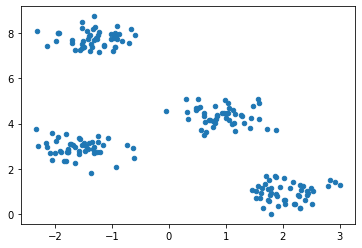

In [31]:
X,y = make_blobs(n_samples = 200 , centers = 4 , cluster_std = 0.4 , random_state = 0)
import matplotlib.pyplot as plt

plt.scatter(X[:,0] , X[:,1] , s = 20)

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 3, 2, 5, 4, 2, 3, 2, 2, 2, 2, 4, 3, 3, 0, 2, 5, 1, 5, 0, 5, 3,
       4, 3, 0, 4, 1, 4, 4, 2, 1, 2, 3, 0, 3, 2, 3, 2, 2, 5, 1, 1, 1, 2,
       4, 3, 2, 5, 5, 2, 1, 3, 3, 1, 2, 5, 3, 4, 2, 0, 5, 2, 0, 2, 5, 2,
       0, 5, 3, 3, 4, 4, 2, 2, 3, 1, 3, 3, 0, 4, 5, 2, 0, 3, 3, 2, 2, 4,
       3, 3, 1, 1, 5, 2, 2, 0, 3, 5, 2, 2, 1, 0, 0, 5, 1, 3, 2, 0, 4, 2,
       1, 3, 3, 0, 4, 2, 3, 3, 5, 2, 5, 3, 2, 4, 2, 3, 2, 3, 4, 2, 3, 0,
       3, 1, 1, 3, 1, 5, 4, 1, 4, 3, 0, 0, 3, 4, 2, 0, 3, 5, 5, 5, 2, 3,
       0, 2, 5, 3, 1, 0, 5, 4, 4, 3, 3, 1, 2, 4, 0, 3, 0, 2, 3, 1, 5, 1,
       2, 2, 3, 2, 3, 4, 2, 4, 2, 3, 3, 5, 2, 1, 4, 4, 2, 1, 3, 3, 3, 2,
       1, 0], dtype=int32)

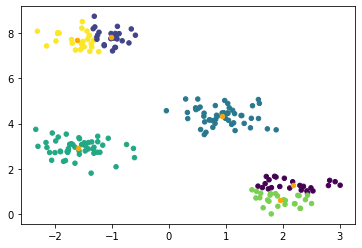

In [35]:
plt.scatter(X[:,0], X[:, 1], c=y_kmeans, s= 20)
cent= kmeans.cluster_centers_
plt.scatter(cent[:,0], cent[:, 1], c='orange', s= 20)

In [18]:
from sklearn.datasets import make_moons

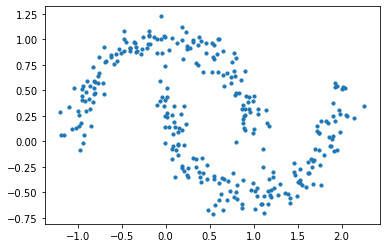

In [19]:
X,y = make_moons(300 , noise = 0.1 , random_state = 0)
plt.scatter(X[:,0], X[:,1] , s= 10)

In [20]:
from sklearn.cluster import SpectralClustering

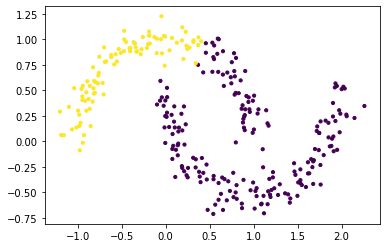

In [26]:
model = SpectralClustering(n_clusters = 2 , affinity= 'nearest_neighbors' , assign_labels= 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0] , X[:,1] , c= labels , s= 10)

In [37]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
print(digits.data.shape)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
centers = kmeans.cluster_centers_
print(centers.data.shape)

(1797, 64)
(10, 64)


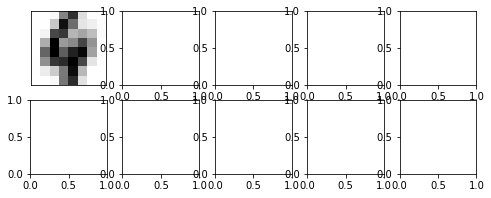

In [41]:

fig, ax = plt.subplots(2,5, figsize=(8,3))

centers = kmeans.cluster_centers_.reshape(10,8,8)

for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center,interpolation="nearest", cmap=plt.cm.binary)
  break

In [45]:
clusters

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

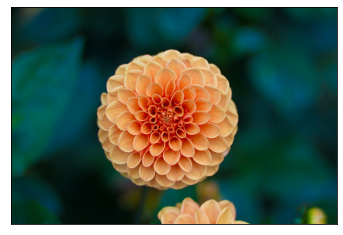

In [40]:

from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax= plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [42]:
data = flower / 255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [43]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_color = kmeans.cluster_centers_[kmeans.predict(data)]
new_color

array([[0.01117236, 0.06738953, 0.04547711],
       [0.01117236, 0.06738953, 0.04547711],
       [0.01117236, 0.06738953, 0.04547711],
       ...,
       [0.0164719 , 0.19021951, 0.15710581],
       [0.0294437 , 0.13208347, 0.09620503],
       [0.0294437 , 0.13208347, 0.09620503]])

Text(0.5, 1.0, 'Compressed Image')

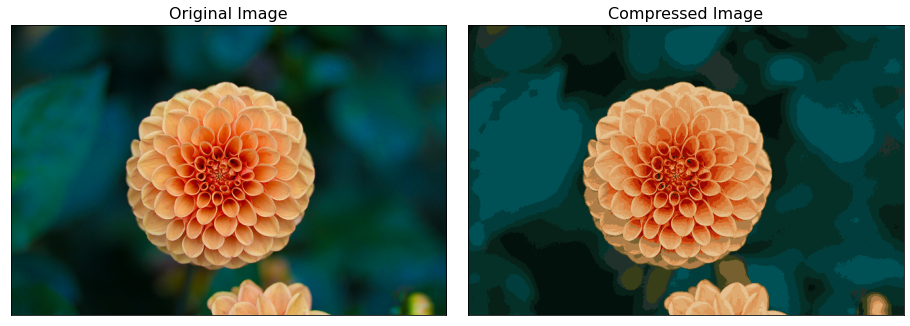

In [44]:
flower_compressed = new_color.reshape(flower.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(flower)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(flower_compressed)
ax[1].set_title("Compressed Image", size=16)